# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hapsoro Wisnu Murti
- **Email:** wisnumurti982@gmail.com
- **ID Dicoding:** wisnumrt

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dari 5 kategori produk terlaris selama beberapa tahun terakhir?
- Bagaimana persentase tingkat kepuasan pelanggan berdasarkan skor ulasan (1-5 bintang) selama beberapa tahun terakhir?
- Bagaimana distribusi geografis pelanggan berdasarkan kota dan negara bagian (state)?
- Tampilkan top 5 penjual berdasarkan jumlah penjualan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Data Wrangling

## Gathering Data

In [2]:
customers_df = pd.read_csv("Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
orderpay_df = pd.read_csv("Dataset/order_payments_dataset.csv")
orderpay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_review_df = pd.read_csv("Dataset/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv("Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

### Customers Dataset


In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
duplication = customers_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


In [13]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Geolocation Dataset

In [14]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
duplication = geolocation_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  261831


In [16]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Tidak ada masalah terkait missing value
- Ada duplikasi sebanyak 261831

### Orders Items Dataset

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
duplication = order_items_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


In [19]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Tidak ada masalah terkait missing value
- type data salah pada kolom shipping_limit_date, seharusnya datetime

### Order Payments Dataset

In [20]:
orderpay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
duplication = orderpay_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


In [22]:
orderpay_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Order Reviews Dataset


In [23]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [25]:
order_review_df['review_score'].unique()

array([4, 5, 1, 3, 2])

In [26]:
duplication = order_review_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


**Insight:**
- Ada data yang missing value
- tidak terdapat duplikasi
- ada kesalahan type data yg harusnya datetime


### Orders Dataset

In [27]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [29]:
duplication = orders_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


**Insight:**
- ada data yang missing value
- ada kesalahan type data

### Product Category Name Dataset

In [30]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
duplication = product_category_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


### Products Dataset

In [32]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [33]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [34]:
duplication = products_df.duplicated().sum()
print("Duplication: ", duplication)
products_df.describe()

Duplication:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat data yang missing value

### Sellers Dataset

In [35]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
duplication = sellers_df.duplicated().sum()
print("Duplication: ", duplication)
sellers_df.describe()

Duplication:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## Cleaning Data

### Menghilangkan Duplicate geolocation_df

In [37]:
geolocation_df.drop_duplicates(inplace=True)

duplication = geolocation_df.duplicated().sum()
print("Duplication: ", duplication)

Duplication:  0


### Mengganti Tipe Data Kolom shipping_limit_date pada order_items_df

In [38]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Menangani Missing Value pada Dataset order_reviews

In [39]:
order_review_df['review_comment_title'] = order_review_df['review_comment_title'].fillna('No Title')

In [40]:
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [41]:
order_review_df['review_comment_message'] = order_review_df['review_comment_message'].fillna('No Comment')

In [42]:
order_review_df[order_review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [43]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


### Mengganti Tipe Data pada order_review_df

In [44]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


### Mengganti Tipe Data pada orders_df

In [45]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date",
                    "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Menangani Missing Value pada orders_df


In [46]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna('unknown')
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna('unknown')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna('unknown')

In [47]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


### Menangani Missing Value pada products_df

In [48]:
products_df[products_df[['product_category_name', 'product_name_lenght',
                         'product_description_lenght', 'product_photos_qty']].isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [49]:
products_df['product_category_name'] = products_df['product_category_name'].fillna('unknown')
products_df[['product_name_lenght', 'product_description_lenght',
             'product_photos_qty']] = products_df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].fillna(0)

In [50]:
products_df[products_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,unknown,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [51]:
# Mengisi nilai yang hilang dengan rata-rata masing-masing kolom
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())

In [52]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


## Exploratory Data Analysis (EDA)

### Explore order_items_df, orders_df, products_df, order_review_df, customers_df, sellers_df

In [53]:
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


In [54]:
orders_df.describe()

,order_purchase_timestamp,order_estimated_delivery_date
count,99441,99441
mean,2017-12-31 08:43:12.776581120,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-11-12 00:00:00


In [55]:
# Analisis status pesanan
orders_items = pd.merge(orders_df, order_items_df, on='order_id')
order_status = orders_df['order_status'].value_counts()
total_orders = order_status.sum()

print("Distribusi status pesanan:")
for status, count in order_status.items():
    percentage = count / total_orders
    absolute_count = int(percentage * total_orders)
    print(f"{status:<12} {absolute_count}")

Distribusi status pesanan:
delivered    96478
shipped      1107
canceled     625
unavailable  609
invoiced     314
processing   301
created      5
approved     2


In [56]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.472488,30.815078,16.937661,23.196728
std,12.071951,637.745057,1.745732,4281.908773,16.913945,13.637140,12.078681
min,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,6.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [57]:
columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
stats_dict = {}
for column in columns:
    stats = products_df[column].describe()
    stats_dict[column] = stats

product_stats_df = pd.DataFrame(stats_dict)
print("Statistik karakteristik produk:")
print(product_stats_df)

Statistik karakteristik produk:
       product_weight_g  product_length_cm  product_height_cm  \
count      32951.000000       32951.000000       32951.000000   
mean        2276.472488          30.815078          16.937661   
std         4281.908773          16.913945          13.637140   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32951.000000  
mean          23.196728  
std           12.078681  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000  


In [58]:
order_review_df.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [59]:
# Distribusi skor review
review_scores = order_review_df['review_score'].value_counts().sort_index().reset_index()
review_scores.columns = ['review_score', 'count']
# Cetak DataFrame distribusi skor review
print("Distribusi skor review :")
print(review_scores)

Distribusi skor review :
   review_score  count
0             1  11424
1             2   3151
2             3   8179
3             4  19142
4             5  57328


In [60]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [61]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [62]:
seller_state_distribution = sellers_df['seller_state'].value_counts()

print("Distribusi penjual berdasarkan negara bagian:")
print(seller_state_distribution)

Distribusi penjual berdasarkan negara bagian:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


## Visualization & Explanatory Analysis

### Bagaimana performa penjualan dari 5 kategori produk terlaris selama beberapa tahun terakhir?


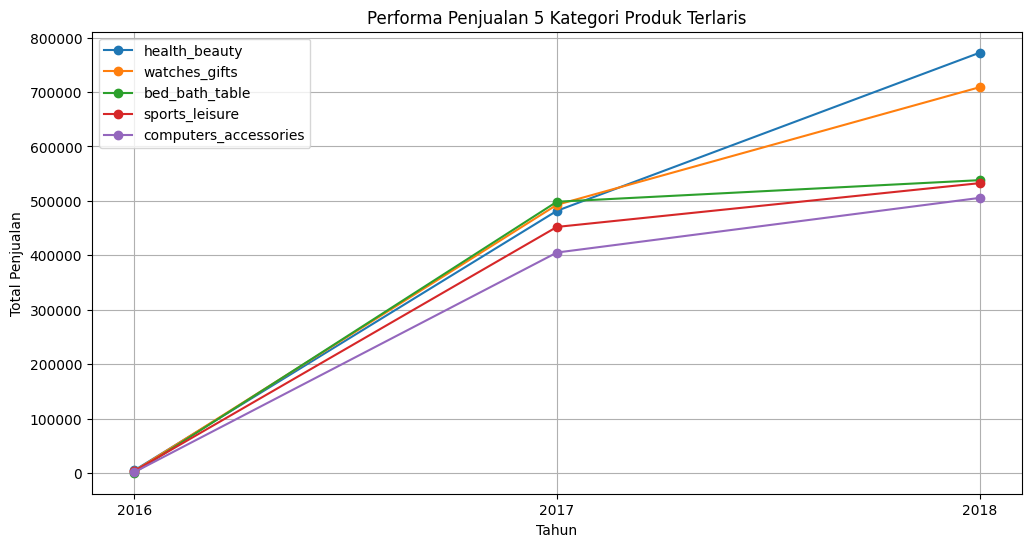

5 Kategori Produk Terlaris:
['health_beauty', 'watches_gifts', 'bed_bath_table', 'sports_leisure', 'computers_accessories']


In [63]:
# Menggabungkan data yang diperlukan
merged_df = pd.merge(order_items_df, products_df, on='product_id')
merged_df = pd.merge(merged_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')
merged_df = pd.merge(merged_df, product_category_df, on='product_category_name')

merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year
category_sales = merged_df.groupby(['product_category_name_english', 'year'])['price'].sum().reset_index()

# Mendapatkan 5 kategori terlaris berdasarkan total penjualan sepanjang waktu
top_5_categories = category_sales.groupby('product_category_name_english')['price'].sum().nlargest(5).index
top_5_sales = category_sales[category_sales['product_category_name_english'].isin(top_5_categories)]
top_5_sales_df = top_5_sales.copy()

# Visualisasi performa penjualan dari 5 kategori produk terlaris
plt.figure(figsize=(12, 6))
for category in top_5_categories:
    data = top_5_sales[top_5_sales['product_category_name_english'] == category]
    plt.plot(data['year'], data['price'], marker='o', label=category)

plt.title('Performa Penjualan 5 Kategori Produk Terlaris')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.legend()
plt.grid(True)

# Menampilkan tahun sebagai label sumbu x
years = sorted(top_5_sales['year'].unique())
plt.xticks(years)

plt.show()

# Menampilkan 5 kategori terlaris
print("5 Kategori Produk Terlaris:")
print(top_5_categories.tolist())

### Bagaimana persentase tingkat kepuasan pelanggan berdasarkan skor ulasan (1-5 bintang) selama beberapa tahun terakhir?


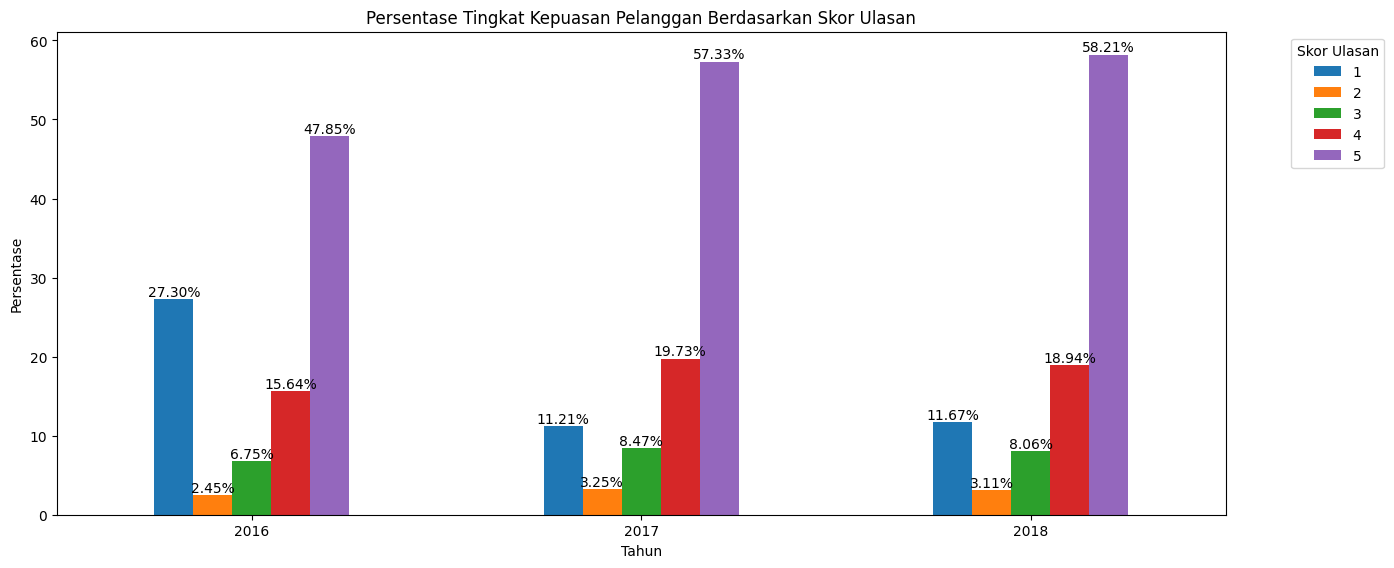

In [64]:
merged_df = pd.merge(order_review_df, orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')

merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

# Menghitung persentase ulasan per tahun
satisfaction_data = merged_df.groupby(['year', 'review_score']).size().unstack()
satisfaction_percentage = satisfaction_data.divide(satisfaction_data.sum(axis=1), axis=0) * 100

satisfaction_percentage_df = satisfaction_percentage.reset_index()

# Visualisasi
ax = satisfaction_percentage.plot(kind='bar', stacked=False, figsize=(14, 6))
plt.title('Persentase Tingkat Kepuasan Pelanggan Berdasarkan Skor Ulasan')
plt.xlabel('Tahun')
plt.ylabel('Persentase')
plt.legend(title='Skor Ulasan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.xticks(rotation=0)

# Menambahkan label persentase pada setiap bar
for c in ax.containers:
    ax.bar_label(c, fmt='%.2f%%', label_type='edge')

plt.show()

### Bagaimana distribusi geografis pelanggan berdasarkan kota dan negara bagian (state)?

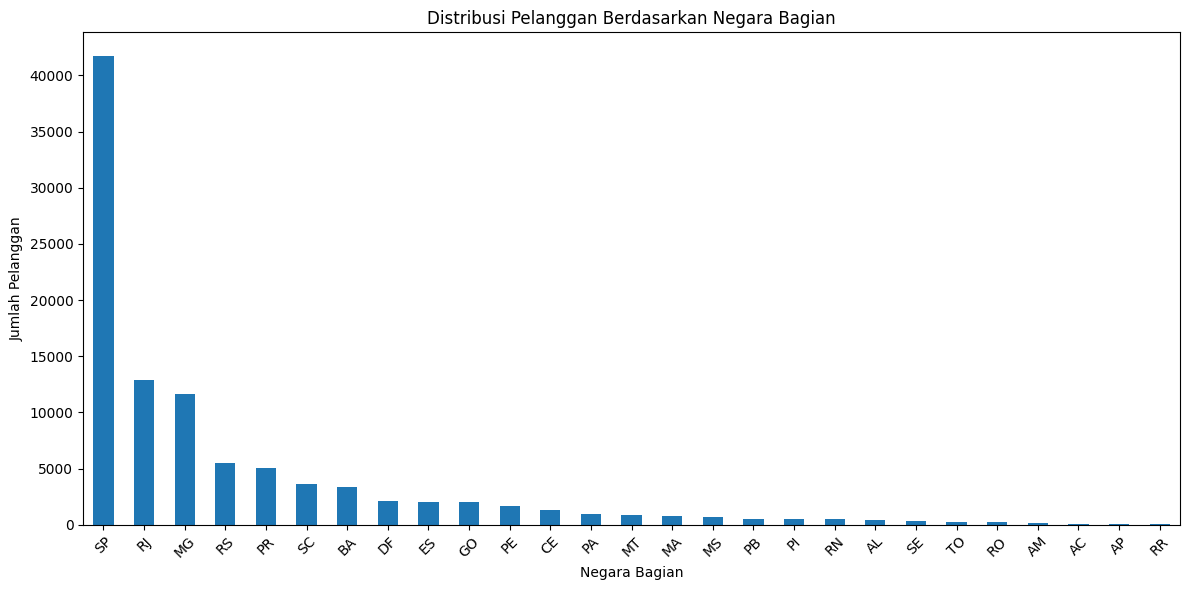

Top 5 Negara Bagian dengan Pelanggan Terbanyak:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64


In [65]:
# Menghitung distribusi geografis pelanggan berdasarkan kota dan negara bagian
geo_distribution_df = customers_df.groupby(['customer_state', 'customer_city']).size().reset_index(name='customer_count')
state_distribution = customers_df['customer_state'].value_counts()
state_distribution_df = state_distribution.reset_index().rename(columns={'index': 'customer_state', 'customer_state': 'customer_count'})

# Visualisasi
plt.figure(figsize=(12, 6))
state_distribution.plot(kind='bar')
plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Menampilkan 5 negara bagian dengan jumlah pelanggan terbanyak
print("Top 5 Negara Bagian dengan Pelanggan Terbanyak:")
print(state_distribution.head())


### Tampilkan top 5 penjual berdasarkan jumlah penjualan?

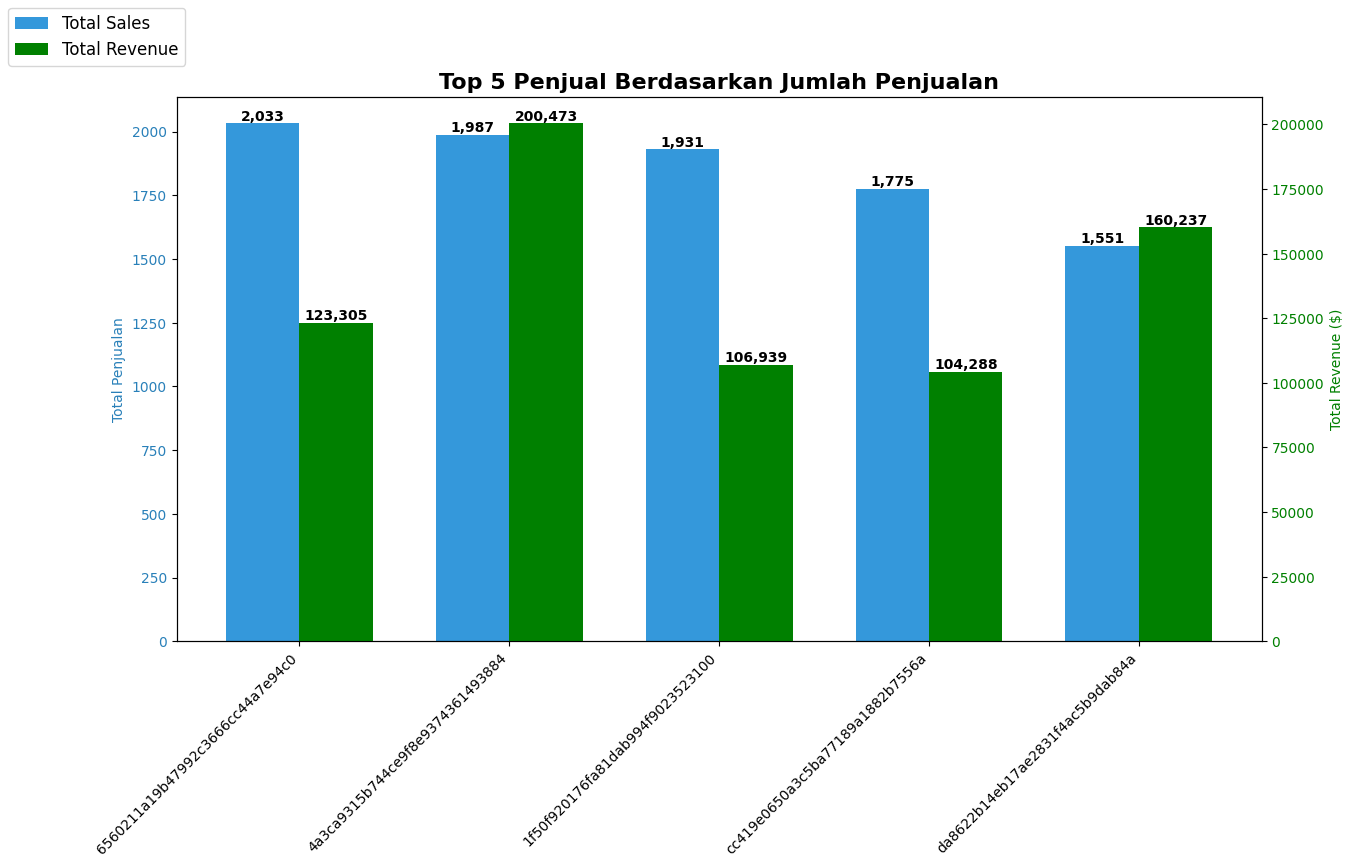

In [66]:
# Menghitung performa penjual
seller_performance = order_items_df.groupby('seller_id').agg({
    'order_id': 'count',
    'price': 'sum'
}).rename(columns={'order_id': 'total_sales', 'price': 'total_revenue'})

# Mendapatkan top 5 penjual berdasarkan total penjualan
top_5_sellers = seller_performance.sort_values('total_sales', ascending=False).head()
top_5_sellers_df = top_5_sellers.copy()

# Visualisasi performa top 5 penjual
fig, ax1 = plt.subplots(figsize=(14, 8))
pos = np.arange(len(top_5_sellers.index))
width = 0.35

# Bar untuk total penjualan
sales_bars = ax1.bar(pos - width/2, top_5_sellers['total_sales'], width, label='Total Sales', color='#3498db')
ax1.set_ylabel('Total Penjualan', color='#2980b9')
ax1.tick_params(axis='y', labelcolor='#2980b9')

# Bar untuk total pendapatan
ax2 = ax1.twinx()
revenue_bars = ax2.bar(pos + width/2, top_5_sellers['total_revenue'], width, label='Total Revenue', color='#008000')
ax2.set_ylabel('Total Revenue ($)', color='#008000')
ax2.tick_params(axis='y', labelcolor='#008000')

# Mengatur label sumbu x
ax1.set_xticks(pos)
ax1.set_xticklabels(top_5_sellers.index, rotation=45, ha='right')

# Menambahkan label nilai pada batang
def add_value_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f}',
                ha='center', va='bottom', fontweight='bold')

add_value_labels(sales_bars, ax1)
add_value_labels(revenue_bars, ax2)

# Menambahkan judul dan mengatur layout
plt.title('Top 5 Penjual Berdasarkan Jumlah Penjualan', fontsize=16, fontweight='bold')
plt.subplots_adjust(bottom=0.2)

# Menambahkan legenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
fig.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=12)

# Menampilkan grafik
plt.show()


## Analisis Lanjutan (Opsional)

In [67]:
# Menggabungkan data orders dan order_items
merged_df = pd.merge(orders_df, order_items_df, on='order_id')

# Menentukan tanggal terakhir di dataset
last_purchase_date = merged_df['order_purchase_timestamp'].max()

# Menghitung metrik RFM untuk setiap pelanggan
rfm_df = merged_df.groupby('customer_id').agg(
    recency=('order_purchase_timestamp', lambda x: (last_purchase_date - x.max()).days),
    frequency=('order_id', 'nunique'),
    monetary=('price', 'sum')
).reset_index()

# Menampilkan hasil analisis dasar RFM
print("Statistik RFM:")
print(rfm_df.describe())

# Menghitung skor RFM dan menampilkan pelanggan dengan skor tertinggi
rfm_df['rfm_score'] = (rfm_df['recency'].rank(ascending=False) +
                       rfm_df['frequency'].rank(ascending=True) +
                       rfm_df['monetary'].rank(ascending=True))

print(rfm_df.sort_values('rfm_score', ascending=False).head(10))


Statistik RFM:
            recency  frequency      monetary
count  98666.000000    98666.0  98666.000000
mean     244.815803        1.0    137.754076
std      153.392909        0.0    210.645145
min        0.000000        1.0      0.850000
25%      121.000000        1.0     45.900000
50%      226.000000        1.0     86.900000
75%      355.000000        1.0    149.900000
max      728.000000        1.0  13440.000000
                            customer_id  recency  frequency  monetary  \
95435  f767e7437c3aa2c044523c0a6712380b        8          1   2300.00   
17941  2e9ae3e10bcfcc16fe0eedc2ac5f9f6a       10          1   2160.00   
32418  544718803ece964e5c1d0b3b3cd751fc        8          1   1240.00   
54692  8e29c6e9c795eda30cf7f47244720132        8          1    999.99   
93004  f0d62fcceaafaea74a143d7fce54f1f4       11          1   1240.00   
89050  e683dddabd8f5c3ad3708a3364e932f8       14          1   2300.00   
54359  8d4fbbdcabdfc2f9b1f52cd523ea5865       13          1   1300.00

## Conclusion

- Conclution pertanyaan 1 : Secara keseluruhan, penjualan lima kategori produk terlaris meningkat signifikan dari 2016 hingga 2018, dengan Health & Beauty dan Watches & Gifts sebagai yang paling unggul. Kategori lainnya juga mengalami pertumbuhan stabil meski lebih moderat.
- Conclution pertanyaan 2 : Secara keseluruhan, tingkat kepuasan pelanggan terus meningkat dengan semakin banyak ulasan positif (4 dan 5 bintang) dan penurunan ulasan negatif (1 bintang) dari tahun ke tahun.
- Conclution Pertanyaan 3 : Mayoritas pelanggan berasal dari SP, RJ, dan MG, menunjukkan fokus pasar utama di negara bagian tersebut, sementara wilayah lain memiliki potensi ekspansi lebih lanjut.
- Conclution Pertanyaan 4 : Penjual teratas memberikan kontribusi besar terhadap pendapatan. Strategi untuk meningkatkan penjualan penjual ini dan memperbaiki performa penjual lainnya dapat meningkatkan profitabilitas keseluruhan.